## DACON 천체 유형 분류 경진대회

1. EDA 및 전처리        
    1) trainset EDA    
    2) testset EDA    
    3) trainset 전처리    
2. 데이터 모델링
3. 결과
4. 인사이트 도출

###### 1. EDA 및 전처리

In [1]:
# 필요한 패키지들을 불러온다
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 데이터 가져오기
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission_df = pd.read_csv("./sample_submission.csv")

train_df

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724
199989,199989,GALAXY,85,21.172003,20.561208,20.031754,19.793644,19.540471,21.704126,20.469748,...,18.880781,18.065559,17.501307,17.180639,17.175205,19.109086,18.004976,17.440331,17.193743,16.969854


In [3]:
# type이 존재하지않음을 확인할 수 있음
# class를 예측하면 그 예측 값을 submission파일에 기입
test_df

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,...,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,...,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,...,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,...,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,...,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,...,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976
10005,209996,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,...,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412
10006,209997,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,...,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932
10007,209998,674,21.625469,21.624585,21.093379,21.191775,21.186596,22.042942,21.950139,21.610805,...,22.320173,21.516809,21.270925,21.196019,21.331529,21.700769,21.589489,21.128330,21.430526,21.220902


In [4]:
# id를 기준으로 원핫 인코딩처럼.. 되어있는 듯 함
# 각 피쳐들은 천체 유형
submission_df

,id,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
0,199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,209995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,209996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10006,209997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,209998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 기초통계량을 보니 최댓값과 최솟값 간의 갭이 너무 큼
# 정규화의 필요성이 있을 것 같음
# 정규화 전 후의 성능을 비교해볼 필요가 있을 듯 함
train_df.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,...,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,57732.57318,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,...,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,0.00000,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,...,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,49997.50000,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,...,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,99995.00000,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,...,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,149992.50000,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,...,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,199990.00000,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,...,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [6]:
# column명
train_df.columns

Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

In [7]:
# type을 제외한 나머지는 모두 수치형
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          199991 non-null  int64  
 1   type        199991 non-null  object 
 2   fiberID     199991 non-null  int64  
 3   psfMag_u    199991 non-null  float64
 4   psfMag_g    199991 non-null  float64
 5   psfMag_r    199991 non-null  float64
 6   psfMag_i    199991 non-null  float64
 7   psfMag_z    199991 non-null  float64
 8   fiberMag_u  199991 non-null  float64
 9   fiberMag_g  199991 non-null  float64
 10  fiberMag_r  199991 non-null  float64
 11  fiberMag_i  199991 non-null  float64
 12  fiberMag_z  199991 non-null  float64
 13  petroMag_u  199991 non-null  float64
 14  petroMag_g  199991 non-null  float64
 15  petroMag_r  199991 non-null  float64
 16  petroMag_i  199991 non-null  float64
 17  petroMag_z  199991 non-null  float64
 18  modelMag_u  199991 non-null  float64
 19  mo

In [8]:
# 결측치 없음
train_df.isna().sum()

id            0
type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

In [9]:
# type의 총 개수 알아보기
train_df['type'].nunique()

19

In [10]:
# 클래스의 불균형이 존재함
train_df['type'].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

<AxesSubplot:>

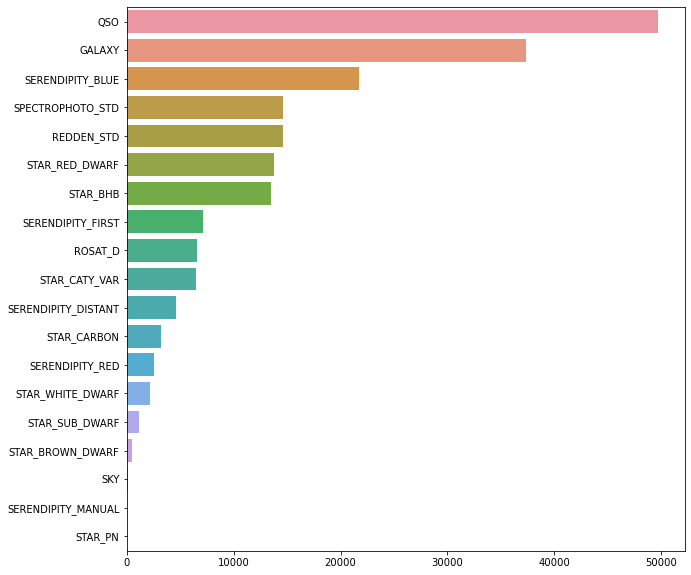

In [11]:
# 클래스 불균형이 존재, 이를 어떻게 해결할 것인가?
plt.figure(figsize=(10, 10))
sns.barplot(x=train_df['type'].value_counts().values, y=train_df['type'].value_counts().index)

C:\Users\1ayou\AppData\Local\Temp\ipykernel_5680\383967159.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df[num_col].hist(ax=ax)


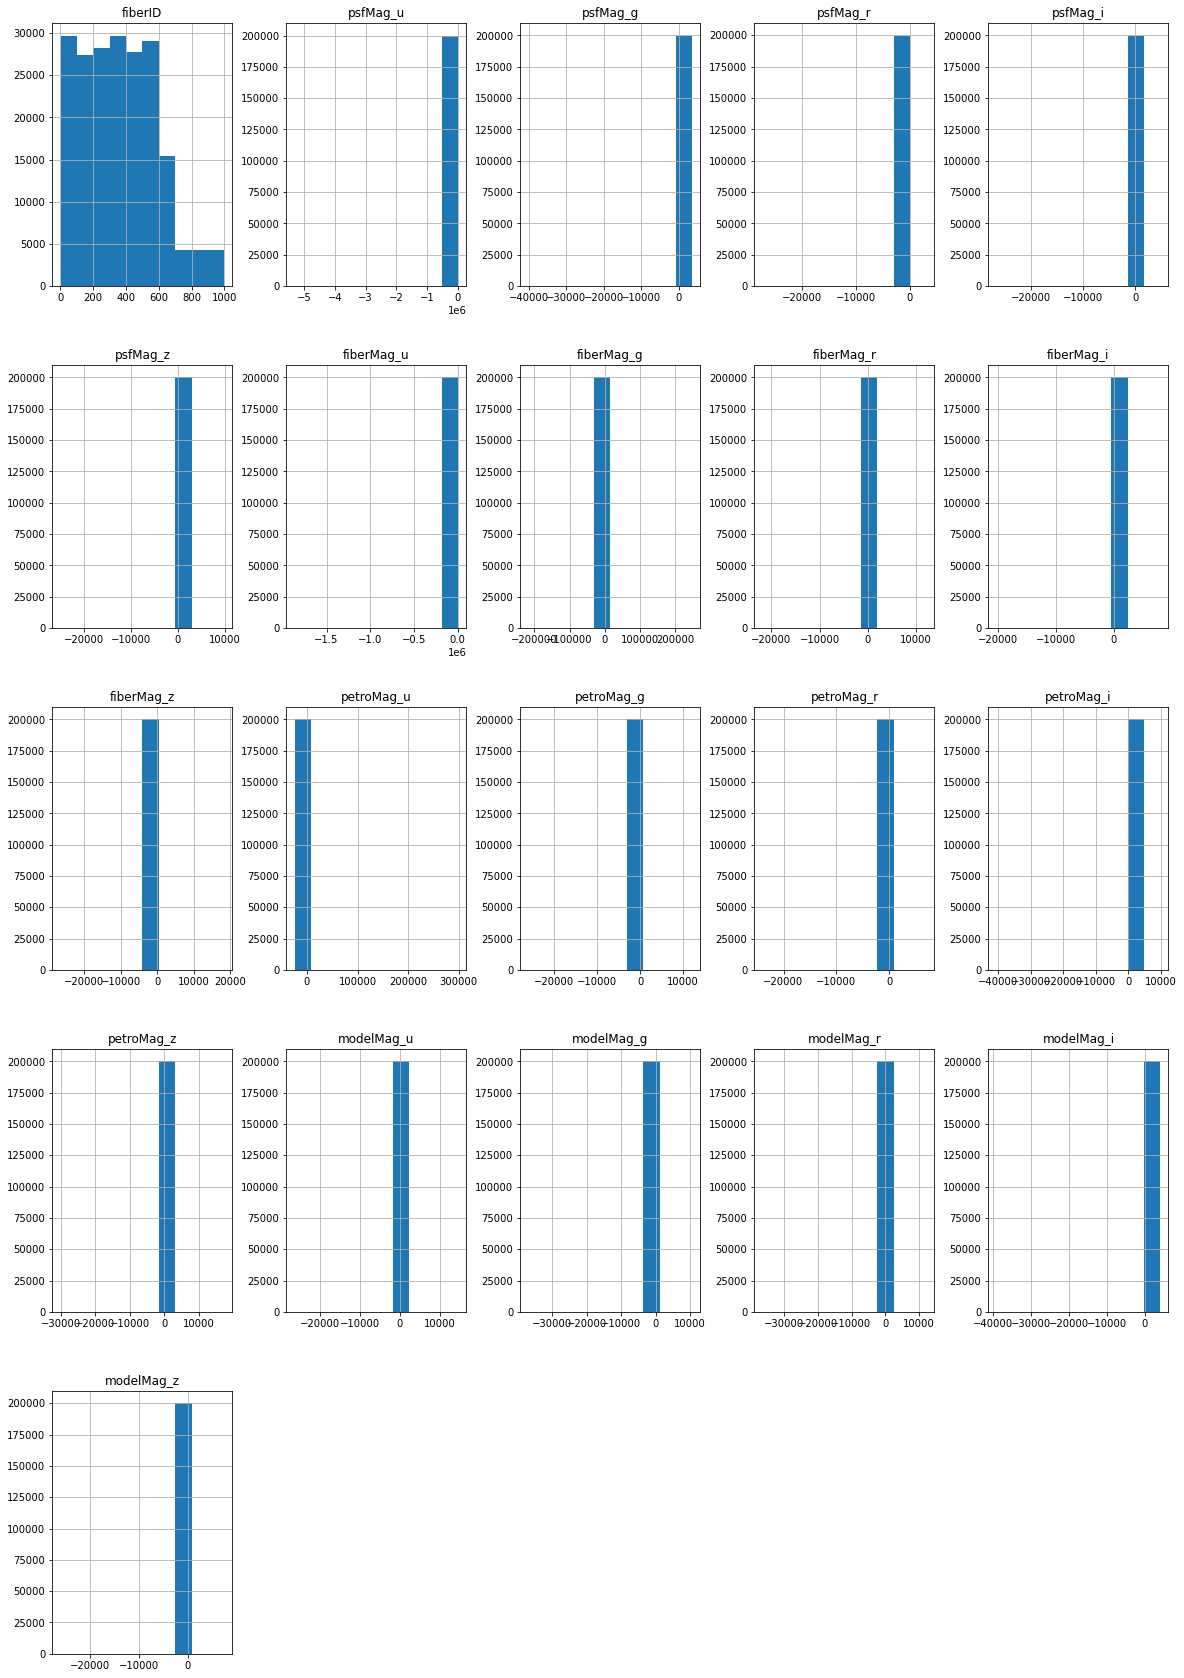

In [12]:
# fiberID의 경우 대략 630~40대에서 수가 급격히 감소함
num_col = train_df.columns[2:]

fig = plt.figure(figsize=(20, 30))
ax = fig.gca()

train_df[num_col].hist(ax=ax)
plt.show()

<AxesSubplot:xlabel='fiberID', ylabel='type'>

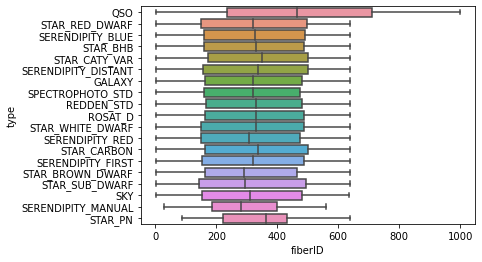

In [13]:
# 각 타입별로 확인했을 때 qso의 경우 전반적으로 가지고 있으나 나머지는 모두 600 초반정도가 최대임을 알 수 있음
# 이런 형태의 fiberID 어떤 영향을 줄까?
sns.boxplot(x=train_df['fiberID'], y=train_df['type'])

In [16]:
# 각 type별 fiberID 최대값 알아보기
train_df.groupby('type')['fiberID'].max()

type
GALAXY                  640
QSO                    1000
REDDEN_STD              640
ROSAT_D                 640
SERENDIPITY_BLUE        640
SERENDIPITY_DISTANT     640
SERENDIPITY_FIRST       640
SERENDIPITY_MANUAL      559
SERENDIPITY_RED         640
SKY                     636
SPECTROPHOTO_STD        640
STAR_BHB                640
STAR_BROWN_DWARF        638
STAR_CARBON             640
STAR_CATY_VAR           640
STAR_PN                 637
STAR_RED_DWARF          640
STAR_SUB_DWARF          638
STAR_WHITE_DWARF        640
Name: fiberID, dtype: int64

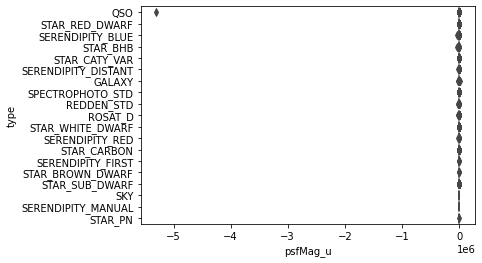

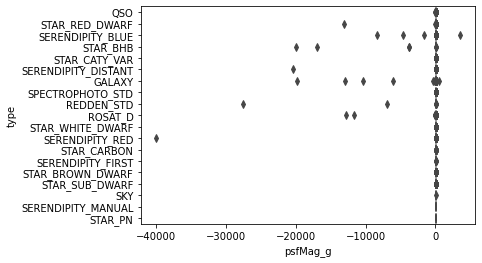

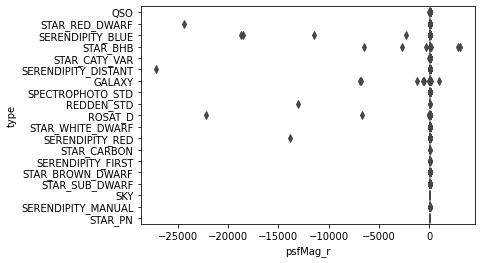

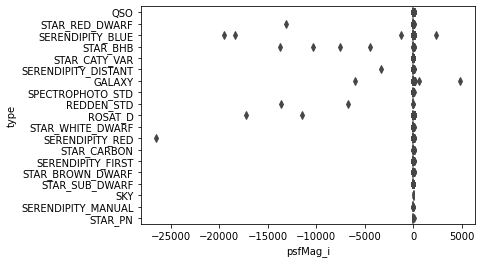

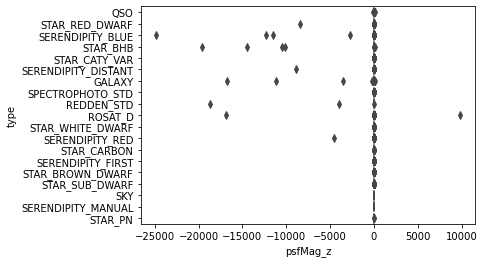

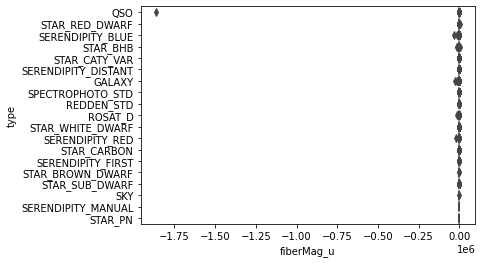

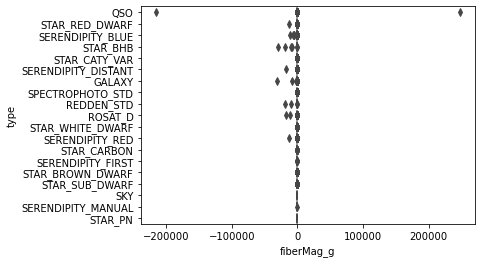

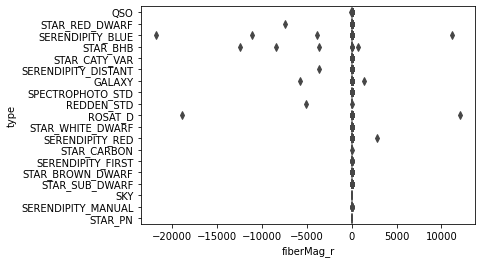

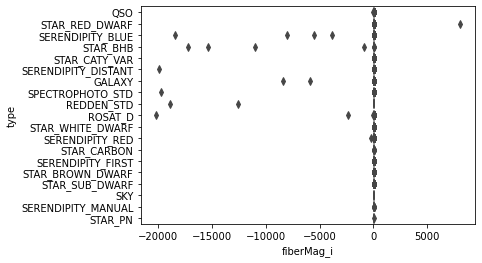

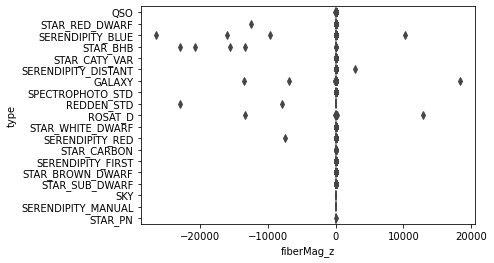

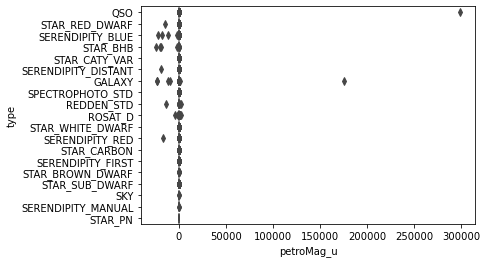

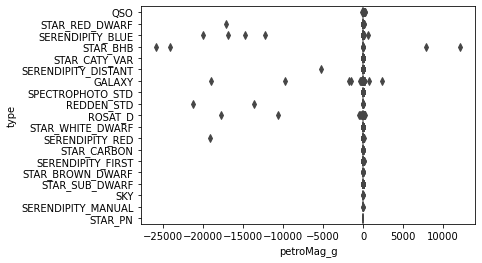

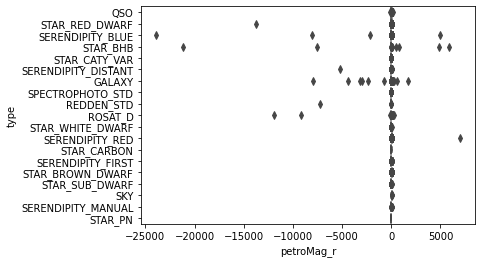

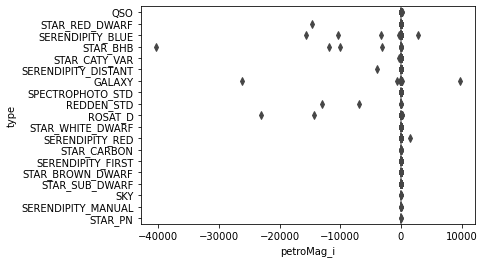

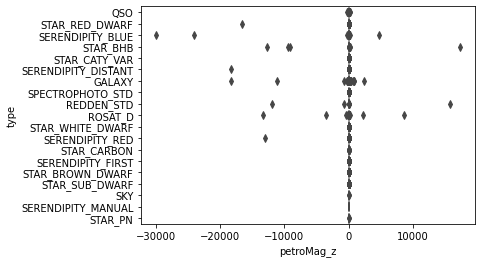

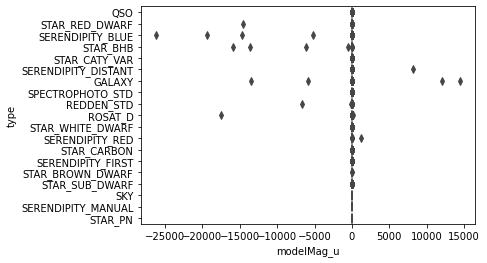

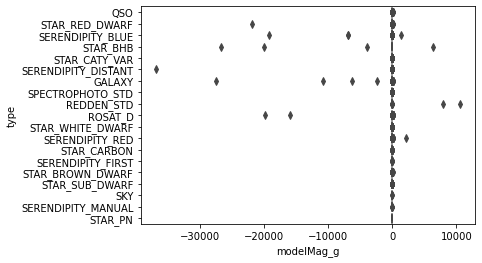

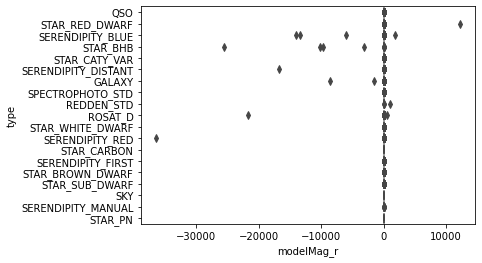

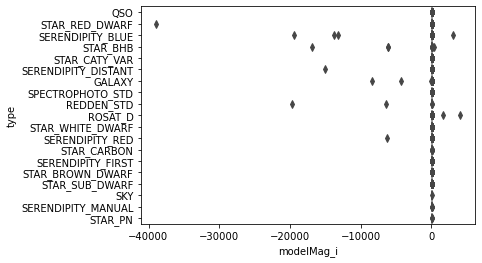

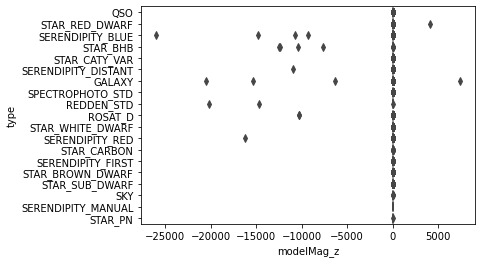

In [18]:
# fiberID를 제외한 각 column별 데이터 분포 및 이상치 탐색

for num_c in num_col[1:]:
    sns.boxplot(x=train_df[num_c], y=train_df['type'])
    plt.show()

### 2. 데이터 모델링

In [29]:
# type을 숫자로 변환
column_number = {}
for i, column in enumerate(submission_df.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))

In [30]:
# train set을 이용해 validation set을 만들어 test set을 이용해 평가 전 검증을 해보고자 함
X = train_df.drop(columns=['type_num', 'type'], axis=1)
y = train_df['type_num']
X_test = test_df

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

model = LGBMClassifier(n_estimators=500,
            learning_rate=0.01,
            boosting_type='gbdt',  # traditional gradient boosting decision tree
            num_leaves=20,
            max_depth=15,
            random_state=100)

model.fit(X_train, y_train)
        
y_pred_proba = model.predict_proba(X_val)
y_pred_acc = model.predict(X_val)

print(accuracy_score(y_val, y_pred_acc))

0.8662622087402914


In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

model = LGBMClassifier(n_estimators=500,
            learning_rate=0.01,
            boosting_type='rf',  # Random Forest
            num_leaves=20,
            max_depth=18,
            random_state=100)

model.fit(X_train, y_train)
        
y_pred_proba = model.predict_proba(X_val)
y_pred_acc = model.predict(X_val)

print(accuracy_score(y_val, y_pred_acc))

LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at C:\b\abs_636j7r6zqr\croot\lightgbm_1677766516694\work\compile\src\boosting\rf.hpp, line 35 .


In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

model = LGBMClassifier(n_estimators=1000,
            learning_rate=0.005,
            boosting_type='gbdt',
            num_leaves=20,
            max_depth=18, 
            random_state=100)

model.fit(X_train, y_train)
        
y_pred_proba = model.predict_proba(X_val)
y_pred_acc = model.predict(X_val)

print(accuracy_score(y_val, y_pred_acc))

0.8664622154071803


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 정규화를 해보자. 
X = train_df.drop(columns=['type_num', 'type'], axis=1)
y = train_df['type_num']
X_test = test_df

# StandardScaler
std = StandardScaler()
std.fit(X)

# # MinMaxScaler
# mm = MinMaxScaler()
# mm.fit(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

model = LGBMClassifier(n_estimators=1000,
            learning_rate=0.005,
            boosting_type='gbdt',
            num_leaves=20,
            max_depth=18, 
            objective='multiclass', 
            random_state=100)

model.fit(X_train, y_train)
        
y_pred_proba = model.predict_proba(X_val)
y_pred_acc = model.predict(X_val)

print(accuracy_score(y_val, y_pred_acc))

0.8664622154071803


In [39]:
print("log loss: {0:.4f}".format(log_loss(y_val, y_pred_proba)))

log loss: 0.3998
